# XRADIO Demo

XRADIO is an open-source Python package that leverages [xarray](https://github.com/pydata/xarray) to provide an interface for radio astronomy data. It includes converters from legacy formats and contains versioned schemas for each dataset type. A schema checker is also included to verify if a dataset conforms to the schema.

Data is organized into:

- [xarray Datasets](https://docs.xarray.dev/en/stable/generated/xarray.Dataset.html): A multi-dimensional, in-memory, array database of labeled n-dimensional arrays.
- [xarray DataTree](https://docs.xarray.dev/en/latest/generated/xarray.DataTree.html): A tree-like hierarchical collection of xarray objects.

The xarray data structures functionality has been expanded by making use of xarray assessors.

## Acronyms
- ps = processing_set
- ms = measurement_set
- xdt = xarray_data_tree
- xds = xarray_data_set
- xda = xarray_data_array
- cor = correlated

## Layout of Data Tree
- ps_xdt
    - ms_xdt  cor_xds
        - antenna_xds
        - weather_xds
        - field_and_source_xds_*
        - ...

```python
ms_xdt = ps_xdt[msv4_name]
cor_xds = ps_xdt[msv4_name].ds
antenna_xds = ps_xdt[msv4_name].antenna_xds.ds
```

## Accessor Access

import xradio.measurement_set  **#Should we rather do this with ```import xradio```?**

- ps_xdt.ps.
    - summary #returns data frame 
    - get_max_dims
    - get_freq_axis
    - sel #based on summary data frame
    - get_combined_field_and_source_xds
    - plot_phase_centers **#Should this be an accessor?**
    - get_combined_antenna_xds
    - plot_antenna_positions **#Should this be an accessor?**
    - ...
- ms_xdt.ms.
    - sel #allows for data group selection
    - get_field_and_source_xds
    - ... **#Do we want accessors for the rest of the sub-datasets**

## Import xradio

In [1]:
import os, pprint
from importlib.metadata import version

try:
    os.system("pip install --upgrade xradio")

    import xradio

    print("Using xradio version", version("xradio"))

except ImportError as exc:
    print(f"Could not import xradio: {exc}")

Using xradio version 0.1.0


## Download example MSv2

### Available Datasets

In [2]:
from toolviper.utils.data import list_files

list_files()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ file                                     ┃ dtype          ┃ telescope   ┃ size     ┃ mode                       ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ ea25_cal_small_before_fixed.split.ms     │ CASA MS v2     │ VLA         │ 0.209    │ Holography                 │
├──────────────────────────────────────────┼────────────────┼─────────────┼──────────┼────────────────────────────┤
│ ea25_cal_small_after_fixed.split.ms      │ CASA MS v2     │ VLA         │ 0.209    │ Holography                 │
├──────────────────────────────────────────┼────────────────┼─────────────┼──────────┼────────────────────────────┤
│ J1924-2914.ms.calibrated.split.SPW3      │ CASA MS v2     │ ALMA        │ 0.055    │ Holography                 │
├──────────────────────────────────────────┼────────────────┼─────────────┼──────────┼────────────────────────────┤
│ extract_holog_verification.json          │ json           │ na          │ 0.000004 │ na                         │
├──────────────────────────────────────────┼────────────────┼─────────────┼──────────┼────────────────────────────┤
│ holog_numerical_verification.json        │ json           │ na          │ 0.000004 │ na                         │
├──────────────────────────────────────────┼────────────────┼─────────────┼──────────┼────────────────────────────┤
│ locit-input-pha.cal                      │ CASA Cal Table │ VLA         │ 0.000468 │ antenna location cal table │
├──────────────────────────────────────────┼────────────────┼─────────────┼──────────┼────────────────────────────┤
│ panel_cutoff_mask                        │ npy            │ na          │ 0.000348 │ na                         │
├──────────────────────────────────────────┼────────────────┼─────────────┼──────────┼────────────────────────────┤
│ heuristic_model                          │ bin            │ na          │ 0.000004 │ na                         │
├──────────────────────────────────────────┼────────────────┼─────────────┼──────────┼────────────────────────────┤
│ panel_test_files                         │ na             │ na          │          │ na                         │
├──────────────────────────────────────────┼────────────────┼─────────────┼──────────┼────────────────────────────┤
│ AA2-Mid-sim_00000.ms                     │ CASA MS v2     │ SKA Mid     │ 0.029    │ Simulated Interferometer   │
├──────────────────────────────────────────┼────────────────┼─────────────┼──────────┼────────────────────────────┤
│ Antennae_M8.img.zarr                     │ zarr           │ ALMA        │ 0.014    │ Interferometer Mosaic      │
├──────────────────────────────────────────┼────────────────┼─────────────┼──────────┼────────────────────────────┤
│ Antennae_North.cal.lsrk.ms               │ CASA MS v2     │ ALMA        │ 0.202    │ Interferometer Mosaic      │
├──────────────────────────────────────────┼────────────────┼─────────────┼──────────┼────────────────────────────┤
│ Antennae_North.cal.lsrk.py39.vis.zarr    │ zarr           │ ALMA        │ 0.207    │ Interferometer Mosaic      │
├──────────────────────────────────────────┼────────────────┼─────────────┼──────────┼────────────────────────────┤
│ Antennae_North.cal.lsrk.split.ms         │ CASA MS v2     │ ALMA        │ 0.0056   │ Interferometer Mosaic      │
├──────────────────────────────────────────┼────────────────┼─────────────┼──────────┼────────────────────────────┤
│ Antennae_North.cal.lsrk.split.py39.vis.… │ zarr           │ ALMA        │ 0.0047   │ Interferometer Mosaic      │
├──────────────────────────────────────────┼────────────────┼─────────────┼──────────┼────────────────────────────┤
│ complex_valued_uv.im                     │ image          │ Simulated   │ 0.768    │ Simulated                  │
├──────────────────────────────────────────┼────────────

In [3]:
from toolviper.utils.data import download
download(file="gmrt.ms")

[2025-02-27 13:05:35,987]  WARNING    viperlog:  File exists: /Users/jsteeb/miniforge3/envs/zinc13/lib/python3.13/site-packages/toolviper/utils/data/.dropbox 
[2025-02-27 13:05:35,987]     INFO    viperlog:  Updating file metadata information ...  
 

 Download List  
 ─────────────── 
  gmrt.ms

[2025-02-27 13:05:36,735]     INFO    viperlog:  File exists: gmrt.ms 


In [4]:
from toolviper.utils.data import download
download(file="ALMA_uid___A002_X1003af4_X75a3.split.avg.ms") #ALMA Mosaic Ephmeris of the Sun.

[2025-02-27 13:05:36,739]  WARNING    viperlog:  File exists: /Users/jsteeb/miniforge3/envs/zinc13/lib/python3.13/site-packages/toolviper/utils/data/.dropbox 
[2025-02-27 13:05:36,739]     INFO    viperlog:  Updating file metadata information ...  
 

 Download List                                
 ───────────────────────────────────────────── 
  ALMA_uid___A002_X1003af4_X75a3.split.avg.ms

[2025-02-27 13:05:37,568]     INFO    viperlog:  File exists: ALMA_uid___A002_X1003af4_X75a3.split.avg.ms 


## Setup Dask Client

In [5]:
from toolviper.dask import local_client

viper_client = local_client(cores=4, memory_limit="4GB")
viper_client

[2025-02-27 13:05:37,591]     INFO    viperlog:  Checking functions availability: 
[2025-02-27 13:05:37,592]     INFO    viperlog:  Loading module: slurm -- Success 
[2025-02-27 13:05:37,592]     INFO    viperlog:     dask_jobqueue is available 
[2025-02-27 13:05:37,593]     INFO    viperlog:  Loading module: dask_ssh -- Fail 
[2025-02-27 13:05:37,593]     INFO    viperlog:     asyncssh is unavailable 
[2025-02-27 13:05:37,593]     INFO    viperlog:     jupyter_server_proxy is unavailable 
[2025-02-27 13:05:37,593]     INFO    viperlog:     paramiko is unavailable 
[2025-02-27 13:05:37,594]     INFO    viperlog:  Loading module: CUDA -- Fail 
[2025-02-27 13:05:37,594]     INFO    viperlog:     dask_cuda is unavailable 
[2025-02-27 13:05:37,594]     INFO    viperlog:  Available functions of this environment: slurm 
[2025-02-27 13:05:37,594]     INFO    viperlog:  Module path: /Users/jsteeb/miniforge3/envs/zinc13/lib/python3.13/site-packages/toolviper 
[2025-02-27 13:05:37,597]  WARNING 

[2025-02-27 13:05:38,379]     INFO    viperlog:  Client <MenrvaClient: 'tcp://127.0.0.1:57157' processes=4 threads=4, memory=14.90 GiB> 


<MenrvaClient: 'tcp://127.0.0.1:57157' processes=4 threads=4, memory=14.90 GiB>

## Processing Set

A Processing Set is an extended Python dictionary that consists of MSv4s that contains a single observation, spectral window, polarization setup, observation mode, processor and beam per antenna.

### Convert MSv2 => Processing Set (PS)

In [6]:
from xradio.measurement_set import convert_msv2_to_processing_set

msv2_name = "ALMA_uid___A002_X1003af4_X75a3.split.avg.ms"
convert_out = "ALMA_uid___A002_X1003af4_X75a3.split.avg.ps.zarr"

convert_msv2_to_processing_set(
    in_file=msv2_name,
    out_file=convert_out,
    overwrite=True,
    parallel=True,
)

Output file:  ALMA_uid___A002_X1003af4_X75a3.split.avg.ps.zarr
[2025-02-27 13:05:40,374]     INFO    viperlog:  Partition scheme that will be used: ['DATA_DESC_ID', 'OBS_MODE', 'OBSERVATION_ID', 'FIELD_ID'] 
[2025-02-27 13:05:41,010]     INFO    viperlog:  Number of partitions: 96 
[2025-02-27 13:05:41,010]     INFO    viperlog:  OBSERVATION_ID [0], DDI [0], STATE [0], FIELD [0], SCAN [7] 
[2025-02-27 13:05:41,012]     INFO    viperlog:  OBSERVATION_ID [0], DDI [0], STATE [16], FIELD [0], SCAN [7] 
[2025-02-27 13:05:41,012]     INFO    viperlog:  OBSERVATION_ID [0], DDI [0], STATE [17], FIELD [0], SCAN [7] 
[2025-02-27 13:05:41,013]     INFO    viperlog:  OBSERVATION_ID [0], DDI [0], STATE [19], FIELD [2], SCAN [6] 
[2025-02-27 13:05:41,014]     INFO    viperlog:  OBSERVATION_ID [0], DDI [0], STATE [20 99], FIELD [0], SCAN [8] 
[2025-02-27 13:05:41,014]     INFO    viperlog:  OBSERVATION_ID [0], DDI [0], STATE [21 48 75], FIELD [3], SCAN [8] 
[2025-02-27 13:05:41,015]     INFO    viper

### Lazy open PS

In [7]:

from xradio.measurement_set import open_processing_set
import xarray as xr
convert_out = "ALMA_uid___A002_X1003af4_X75a3.split.avg.ps.zarr"

ps_xdt = xr.open_datatree(convert_out)
# for zarr this is equivalent ps_xdt = open_processing_set(convert_out)
ps_xdt["ALMA_uid___A002_X1003af4_X75a3.split.avg_00"].ms.get_partition_info()
ps_xdt.ps.summary()

name  \
0   ALMA_uid___A002_X1003af4_X75a3.split.avg_00   
1   ALMA_uid___A002_X1003af4_X75a3.split.avg_01   
2   ALMA_uid___A002_X1003af4_X75a3.split.avg_02   
3   ALMA_uid___A002_X1003af4_X75a3.split.avg_03   
4   ALMA_uid___A002_X1003af4_X75a3.split.avg_04   
..                                          ...   
91  ALMA_uid___A002_X1003af4_X75a3.split.avg_91   
92  ALMA_uid___A002_X1003af4_X75a3.split.avg_92   
93  ALMA_uid___A002_X1003af4_X75a3.split.avg_93   
94  ALMA_uid___A002_X1003af4_X75a3.split.avg_94   
95  ALMA_uid___A002_X1003af4_X75a3.split.avg_95   

                                              intents            shape  \
0   [CALIBRATE_ATMOSPHERE#OFF_SOURCE, CALIBRATE_WV...    (3, 51, 1, 2)   
1   [CALIBRATE_ATMOSPHERE#AMBIENT, CALIBRATE_WVR#A...    (3, 51, 1, 2)   
2       [CALIBRATE_ATMOSPHERE#HOT, CALIBRATE_WVR#HOT]    (3, 51, 1, 2)   
3   [CALIBRATE_PHASE#ON_SOURCE, CALIBRATE_WVR#ON_S...   (31, 51, 1, 2)   
4                         [OBSERVE_TARGET#OFF_SOURCE]   (14, 51, 1, 2)   
..                                                ...              ...   
91                         [OBSERVE_TARGET#ON_SOURCE]  (9, 1326, 7, 2)   
92                         [OBSERVE_TARGET#ON_SOURCE]  (9, 1326, 7, 2)   
93                         [OBSERVE_TARGET#ON_SOURCE]  (6, 1326, 7, 2)   
94                         [OBSERVE_TARGET#ON_SOURCE]  (6, 1326, 7, 2)   
95                         [OBSERVE_TARGET#ON_SOURCE]  (6, 1326, 7, 2)   

   polarization scan_name                                     spw_name  \
0      [XX, YY]       [7]            X767114449#ALMA_RB_06#BB_4#SQLD_0   
1      [XX, YY]       [7]            X767114449#ALMA_RB_06#BB_4#SQLD_0   
2      [XX, YY]       [7]            X767114449#ALMA_RB_06#BB_4#SQLD_0   
3      [XX, YY]       [6]            X767114449#ALMA_RB_06#BB_4#SQLD_0   
4      [XX, YY]       [8]            X767114449#ALMA_RB_06#BB_4#SQLD_0   
..          ...       ...                                          ...   
91     [XX, YY]       [8]  X767114449#ALMA_RB_06#BB_1#SW-01#FULL_RES_2   
92     [XX, YY]       [8]  X767114449#ALMA_RB_06#BB_1#SW-01#FULL_RES_2   
93     [XX, YY]       [8]  X767114449#ALMA_RB_06#BB_1#SW-01#FULL_RES_2   
94     [XX, YY]       [8]  X767114449#ALMA_RB_06#BB_1#SW-01#FULL_RES_2   
95     [XX, YY]       [8]  X767114449#ALMA_RB_06#BB_1#SW-01#FULL_RES_2   

        field_name     source_name                 line_name  \
0       [Sun_10_0]      [Sun_10_0]                        []   
1       [Sun_10_0]      [Sun_10_0]                        []   
2       [Sun_10_0]      [Sun_10_0]                        []   
3   [J1408-0752_2]  [J1408-0752_2]                        []   
4       [Sun_10_0]      [Sun_10_0]                        []   
..             ...             ...                       ...   
91     [Sun_10_25]      [Sun_10_0]  [Single_Continuum(ID=0)]   
92     [Sun_10_26]      [Sun_10_0]  [Single_Continuum(ID=0)]   
93     [Sun_10_27]      [Sun_10_0]  [Single_Continuum(ID=0)]   
94     [Sun_10_28]      [Sun_10_0]  [Single_Continuum(ID=0)]   
95     [Sun_10_29]      [Sun_10_0]  [Single_Continuum(ID=0)]   

                          field_coords  start_frequency  end_frequency  
0                            Ephemeris     2.480000e+11   2.480000e+11  
1                            Ephemeris     2.480000e+11   2.480000e+11  
2                            Ephemeris     2.480000e+11   2.480000e+11  
3   [icrs, 14h08m56.48s, -7d52m26.67s]     2.480000e+11   2.480000e+11  
4                            Ephemeris     2.480000e+11   2.480000e+11  
..                                 ...              ...            ...  
91                           Ephemeris     2.299609e+11   2.300547e+11  
92                           Ephemeris     2.299609e+11   2.300547e+11  
93                           Ephemeris     2.299609e+11   2.300547e+11  
94                           Ephemeris     2.299609e+11   2.300547e+11  
95                           Ephemeris     2.299609e+11   2.300547e+11  

[96 ro

In [8]:
ps_xdt["ALMA_uid___A002_X1003af4_X75a3.split.avg_00"]

<xarray.DataTree 'ALMA_uid___A002_X1003af4_X75a3.split.avg_00'>
Group: /ALMA_uid___A002_X1003af4_X75a3.split.avg_00
│   Dimensions:                     (time: 3, baseline_id: 51, frequency: 1,
│                                    polarization: 2, uvw_label: 3)
│   Coordinates:
│       baseline_antenna1_name      (baseline_id) <U9 2kB ...
│       baseline_antenna2_name      (baseline_id) <U9 2kB ...
│     * baseline_id                 (baseline_id) int64 408B 0 1 2 3 ... 47 48 49 50
│       field_name                  (time) <U28 336B ...
│     * frequency                   (frequency) float64 8B 2.48e+11
│     * polarization                (polarization) <U2 16B 'XX' 'YY'
│       scan_name                   (time) <U21 252B '7' '7' '7'
│     * time                        (time) float64 24B 1.667e+09 1.667e+09 1.667e+09
│     * uvw_label                   (uvw_label) <U1 12B 'u' 'v' 'w'
│   Data variables:
│       EFFECTIVE_INTEGRATION_TIME  (time, baseline_id) float64 1kB ...
│       FLAG                        (time, baseline_id, frequency, polarization) bool 306B ...
│       TIME_CENTROID               (time, baseline_id) float64 1kB ...
│       UVW                         (time, baseline_id, uvw_label) float64 4kB ...
│       VISIBILITY                  (time, baseline_id, frequency, polarization) complex64 2kB ...
│       WEIGHT                      (time, baseline_id, frequency, polarization) float32 1kB ...
│   Attributes:
│       creation_date:     2025-02-27T18:05:43.093102+00:00
│       data_groups:       {'base': {'correlated_data': 'VISIBILITY', 'flag': 'FL...
│       observation_info:  {'intents': ['CALIBRATE_ATMOSPHERE#OFF_SOURCE', 'CALIB...
│       processor_info:    {'sub_type': 'SQUARE_LAW_DETECTOR', 'type': 'RADIOMETER'}
│       schema_version:    4.0.-9989
│       type:              visibility
│       xradio_version:    0.1.0
├── Group: /ALMA_uid___A002_X1003af4_X75a3.split.avg_00/antenna_xds
│       Dimensions:                 (antenna_name: 51, cartesian_pos_label: 3,
│                                    receptor_label: 2)
│       Coordinates:
│         * antenna_name            (antenna_name) <U9 2kB 'CM01_N602' ... 'DV25_A011'
│         * cartesian_pos_label     (cartesian_pos_label) <U1 12B 'x' 'y' 'z'
│           mount                   (antenna_name) <U6 1kB ...
│           polarization_type       (antenna_name, receptor_label) <U1 408B ...
│         * receptor_label          (receptor_label) <U5 40B 'pol_0' 'pol_1'
│           station                 (antenna_name) <U4 816B ...
│           telescope_name          (antenna_name) <U4 816B ...
│       Data variables:
│           ANTENNA_DISH_DIAMETER   (antenna_name) float64 408B ...
│           ANTENNA_POSITION        (antenna_name, cartesian_pos_label) float64 1kB ...
│           ANTENNA_RECEPTOR_ANGLE  (antenna_name, receptor_label) float64 816B ...
│       Attributes:
│           overall_telescope_name:  ALMA
│           relocatable_antennas:    True
│           type:                    antenna
└── Group: /ALMA_uid___A002_X1003af4_X75a3.split.avg_00/field_and_source_xds_base
        Dimensions:                       (time: 3, sky_pos_label: 3,
                                           time_ephemeris: 2, ellipsoid_pos_label: 3,
                                           sky_dir_label: 2)
        Coordinates:
          * ellipsoid_pos_label           (ellipsoid_pos_label) <U4 48B 'lon' ... 'dist'
            field_name                    (time) <U28 336B 'Sun_10_0' ... 'Sun_10_0'
          * sky_dir_label                 (sky_dir_label) <U3 24B 'ra' 'dec'
          * sky_pos_label                 (sky_pos_label) <U4 48B 'ra' 'dec' 'dist'
            source_name                   (time) <U28 336B 'Sun_10_0' ... 'Sun_10_0'
          * time_ephemeris                (time_ephemeris) float64 16B 1.667e+09 1.66...
        Data variables:
            FIELD_PHASE_CENTER            (time, sky_pos_label) float64 72B ...
            HELIOCENTRIC_RADIAL_VELOCITY 

## PS Methods: Summary

Generate and retrieve a summary of the Processing Set.

The summary includes information such as the names of the Measurement Sets, their intents, polarizations, spectral window names, field names, source names, field coordinates, start frequencies, and end frequencies.

In [9]:
import pandas as pd
pd.set_option('display.max_rows', None)
ps_xdt.ps.summary() #returns a pandas dictionary.

name  \
0   ALMA_uid___A002_X1003af4_X75a3.split.avg_00   
1   ALMA_uid___A002_X1003af4_X75a3.split.avg_01   
2   ALMA_uid___A002_X1003af4_X75a3.split.avg_02   
3   ALMA_uid___A002_X1003af4_X75a3.split.avg_03   
4   ALMA_uid___A002_X1003af4_X75a3.split.avg_04   
5   ALMA_uid___A002_X1003af4_X75a3.split.avg_05   
6   ALMA_uid___A002_X1003af4_X75a3.split.avg_06   
7   ALMA_uid___A002_X1003af4_X75a3.split.avg_07   
8   ALMA_uid___A002_X1003af4_X75a3.split.avg_08   
9   ALMA_uid___A002_X1003af4_X75a3.split.avg_09   
10  ALMA_uid___A002_X1003af4_X75a3.split.avg_10   
11  ALMA_uid___A002_X1003af4_X75a3.split.avg_11   
12  ALMA_uid___A002_X1003af4_X75a3.split.avg_12   
13  ALMA_uid___A002_X1003af4_X75a3.split.avg_13   
14  ALMA_uid___A002_X1003af4_X75a3.split.avg_14   
15  ALMA_uid___A002_X1003af4_X75a3.split.avg_15   
16  ALMA_uid___A002_X1003af4_X75a3.split.avg_16   
17  ALMA_uid___A002_X1003af4_X75a3.split.avg_17   
18  ALMA_uid___A002_X1003af4_X75a3.split.avg_18   
19  ALMA_uid___A002_X1003af4_X75a3.split.avg_19   
20  ALMA_uid___A002_X1003af4_X75a3.split.avg_20   
21  ALMA_uid___A002_X1003af4_X75a3.split.avg_21   
22  ALMA_uid___A002_X1003af4_X75a3.split.avg_22   
23  ALMA_uid___A002_X1003af4_X75a3.split.avg_23   
24  ALMA_uid___A002_X1003af4_X75a3.split.avg_24   
25  ALMA_uid___A002_X1003af4_X75a3.split.avg_25   
26  ALMA_uid___A002_X1003af4_X75a3.split.avg_26   
27  ALMA_uid___A002_X1003af4_X75a3.split.avg_27   
28  ALMA_uid___A002_X1003af4_X75a3.split.avg_28   
29  ALMA_uid___A002_X1003af4_X75a3.split.avg_29   
30  ALMA_uid___A002_X1003af4_X75a3.split.avg_30   
31  ALMA_uid___A002_X1003af4_X75a3.split.avg_31   
32  ALMA_uid___A002_X1003af4_X75a3.split.avg_32   
33  ALMA_uid___A002_X1003af4_X75a3.split.avg_33   
34  ALMA_uid___A002_X1003af4_X75a3.split.avg_34   
35  ALMA_uid___A002_X1003af4_X75a3.split.avg_35   
36  ALMA_uid___A002_X1003af4_X75a3.split.avg_36   
37  ALMA_uid___A002_X1003af4_X75a3.split.avg_37   
38  ALMA_uid___A002_X1003af4_X75a3.split.avg_38   
39  ALMA_uid___A002_X1003af4_X75a3.split.avg_39   
40  ALMA_uid___A002_X1003af4_X75a3.split.avg_40   
41  ALMA_uid___A002_X1003af4_X75a3.split.avg_41   
42  ALMA_uid___A002_X1003af4_X75a3.split.avg_42   
43  ALMA_uid___A002_X1003af4_X75a3.split.avg_43   
44  ALMA_uid___A002_X1003af4_X75a3.split.avg_44   
45  ALMA_uid___A002_X1003af4_X75a3.split.avg_45   
46  ALMA_uid___A002_X1003af4_X75a3.split.avg_46   
47  ALMA_uid___A002_X1003af4_X75a3.split.avg_47   
48  ALMA_uid___A002_X1003af4_X75a3.split.avg_48   
49  ALMA_uid___A002_X1003af4_X75a3.split.avg_49   
50  ALMA_uid___A002_X1003af4_X75a3.split.avg_50   
51  ALMA_uid___A002_X1003af4_X75a3.split.avg_51   
52  ALMA_uid___A002_X1003af4_X75a3.split.avg_52   
53  ALMA_uid___A002_X1003af4_X75a3.split.avg_53   
54  ALMA_uid___A002_X1003af4_X75a3.split.avg_54   
55  ALMA_uid___A002_X1003af4_X75a3.split.avg_55   
56  ALMA_uid___A002_X1003af4_X75a3.split.avg_56   
57  ALMA_uid___A002_X1003af4_X75a3.split.avg_57   
58  ALMA_uid___A002_X1003af4_X75a3.split.avg_58   
59  ALMA_uid___A002_X1003af4_X75a3.split.avg_59   
60  ALMA_uid___A002_X1003af4_X75a3.split.avg_60   
61  ALMA_uid___A002_X1003af4_X75a3.split.avg_61   
62  ALMA_uid___A002_X1003af4_X75a3.split.avg_62   
63  ALMA_uid___A002_X1003af4_X75a3.split.avg_63   
64  ALMA_uid___A002_X1003af4_X75a3.split.avg_64   
65  ALMA_uid___A002_X1003af4_X75a3.split.avg_65   
66  ALMA_uid___A002_X1003af4_X75a3.split.avg_66   
67  ALMA_uid___A002_X1003af4_X75a3.split.avg_67   
68  ALMA_uid___A002_X1003af4_X75a3.split.avg_68   
69  ALMA_uid___A002_X1003af4_X75a3.split.avg_69   
70  ALMA_uid___A002_X1003af4_X75a3.split.avg_70   
71  ALMA_uid___A002_X1003af4_X75a3.split.avg_71   
72  ALMA_uid___A002_X1003af4_X75a3.split.avg_72   
73  ALMA_uid___A002_X1003af4_X75a3.split.avg_73   
74  ALMA_uid___A002_X1003af4_X75a3.split.avg_74   
75  ALMA_uid___A002_X1003af4_X75a3.split.avg_75   
76  ALMA_uid___A002_X1003af4_X75a3.split.avg_76   
77  ALMA_uid___A002_X1003af4_X75a3.split.avg_77   
78  ALMA_uid__

In [10]:
ps_xdt.ps.query(spw_name="X767114449#ALMA_RB_06#BB_1#SW-01#FULL_RES_2")

<xarray.DataTree>
Group: /
│   Attributes:
│       type:     processing_set
├── Group: /ALMA_uid___A002_X1003af4_X75a3.split.avg_64
│   │   Dimensions:                     (time: 2, baseline_id: 1326, frequency: 7,
│   │                                    polarization: 2, uvw_label: 3)
│   │   Coordinates:
│   │       baseline_antenna1_name      (baseline_id) <U9 48kB ...
│   │       baseline_antenna2_name      (baseline_id) <U9 48kB ...
│   │     * baseline_id                 (baseline_id) int64 11kB 0 1 2 ... 1324 1325
│   │       field_name                  (time) <U28 224B ...
│   │     * frequency                   (frequency) float64 56B 2.3e+11 ... 2.301e+11
│   │     * polarization                (polarization) <U2 16B 'XX' 'YY'
│   │       scan_name                   (time) <U21 168B '7' '7'
│   │     * time                        (time) float64 16B 1.667e+09 1.667e+09
│   │     * uvw_label                   (uvw_label) <U1 12B 'u' 'v' 'w'
│   │   Data variables:
│   │       EFFECTIVE_INTEGRATION_TIME  (time, baseline_id) float64 21kB ...
│   │       FLAG                        (time, baseline_id, frequency, polarization) bool 37kB ...
│   │       TIME_CENTROID               (time, baseline_id) float64 21kB ...
│   │       UVW                         (time, baseline_id, uvw_label) float64 64kB ...
│   │       VISIBILITY                  (time, baseline_id, frequency, polarization) complex64 297kB ...
│   │       WEIGHT                      (time, baseline_id, frequency, polarization) float32 149kB ...
│   │   Attributes:
│   │       creation_date:     2025-02-27T18:05:47.065680+00:00
│   │       data_groups:       {'base': {'correlated_data': 'VISIBILITY', 'flag': 'FL...
│   │       observation_info:  {'intents': ['CALIBRATE_ATMOSPHERE#OFF_SOURCE', 'CALIB...
│   │       processor_info:    {'sub_type': 'ALMA_BASELINE', 'type': 'CORRELATOR'}
│   │       schema_version:    4.0.-9989
│   │       type:              visibility
│   │       xradio_version:    0.1.0
│   ├── Group: /ALMA_uid___A002_X1003af4_X75a3.split.avg_64/antenna_xds
│   │       Dimensions:                 (antenna_name: 51, cartesian_pos_label: 3,
│   │                                    receptor_label: 2)
│   │       Coordinates:
│   │         * antenna_name            (antenna_name) <U9 2kB 'CM01_N602' ... 'DV25_A011'
│   │         * cartesian_pos_label     (cartesian_pos_label) <U1 12B 'x' 'y' 'z'
│   │           mount                   (antenna_name) <U6 1kB ...
│   │           polarization_type       (antenna_name, receptor_label) <U1 408B ...
│   │         * receptor_label          (receptor_label) <U5 40B 'pol_0' 'pol_1'
│   │           station                 (antenna_name) <U4 816B ...
│   │           telescope_name          (antenna_name) <U4 816B ...
│   │       Data variables:
│   │           ANTENNA_DISH_DIAMETER   (antenna_name) float64 408B ...
│   │           ANTENNA_POSITION        (antenna_name, cartesian_pos_label) float64 1kB ...
│   │           ANTENNA_RECEPTOR_ANGLE  (antenna_name, receptor_label) float64 816B ...
│   │       Attributes:
│   │           overall_telescope_name:  ALMA
│   │           relocatable_antennas:    True
│   │           type:                    antenna
│   ├── Group: /ALMA_uid___A002_X1003af4_X75a3.split.avg_64/field_and_source_xds_base
│   │       Dimensions:                       (time: 2, sky_pos_label: 3,
│   │                                          time_ephemeris: 2, line_label: 1,
│   │                                          ellipsoid_pos_label: 3, sky_dir_label: 2)
│   │       Coordinates:
│   │         * ellipsoid_pos_label           (ellipsoid_pos_label) <U4 48B 'lon' ... 'dist'
│   │           field_name                    (time) <U28 224B 'Sun_10_0' 'Sun_10_0'
│   │         * line_label                    (line_label) <U21 84B '0'
│   │           line_name                     (time, line_label) <U22 176B 'Single_Contin...
│   │         * sky_dir_label                 (sky_dir_label) <U3 24B 'ra' 

## PS Methods: Sub-selecting from PS
Select a subset of the Processing Set based on specified criteria.

This method allows filtering the Processing Set by matching column names and values or by applying a Pandas query string. The selection criteria can target various attributes of the Measurement Sets such as intents, polarization, spectral window names, etc.

In [11]:
from xradio.measurement_set import open_processing_set
convert_out = "ALMA_uid___A002_X1003af4_X75a3.split.avg.ps.zarr"

ps_xdt = open_processing_set(convert_out)

sub_ps_xdt = ps_xdt.ps.query(intents="OBSERVE_TARGET#ON_SOURCE",spw_name="FULL_RES",string_exact_match=False)
sub_ps_xdt.ps.summary()

name                     intents  \
0   ALMA_uid___A002_X1003af4_X75a3.split.avg_69  [OBSERVE_TARGET#ON_SOURCE]   
1   ALMA_uid___A002_X1003af4_X75a3.split.avg_70  [OBSERVE_TARGET#ON_SOURCE]   
2   ALMA_uid___A002_X1003af4_X75a3.split.avg_71  [OBSERVE_TARGET#ON_SOURCE]   
3   ALMA_uid___A002_X1003af4_X75a3.split.avg_72  [OBSERVE_TARGET#ON_SOURCE]   
4   ALMA_uid___A002_X1003af4_X75a3.split.avg_73  [OBSERVE_TARGET#ON_SOURCE]   
5   ALMA_uid___A002_X1003af4_X75a3.split.avg_74  [OBSERVE_TARGET#ON_SOURCE]   
6   ALMA_uid___A002_X1003af4_X75a3.split.avg_75  [OBSERVE_TARGET#ON_SOURCE]   
7   ALMA_uid___A002_X1003af4_X75a3.split.avg_76  [OBSERVE_TARGET#ON_SOURCE]   
8   ALMA_uid___A002_X1003af4_X75a3.split.avg_77  [OBSERVE_TARGET#ON_SOURCE]   
9   ALMA_uid___A002_X1003af4_X75a3.split.avg_78  [OBSERVE_TARGET#ON_SOURCE]   
10  ALMA_uid___A002_X1003af4_X75a3.split.avg_79  [OBSERVE_TARGET#ON_SOURCE]   
11  ALMA_uid___A002_X1003af4_X75a3.split.avg_80  [OBSERVE_TARGET#ON_SOURCE]   
12  ALMA_uid___A002_X1003af4_X75a3.split.avg_81  [OBSERVE_TARGET#ON_SOURCE]   
13  ALMA_uid___A002_X1003af4_X75a3.split.avg_82  [OBSERVE_TARGET#ON_SOURCE]   
14  ALMA_uid___A002_X1003af4_X75a3.split.avg_83  [OBSERVE_TARGET#ON_SOURCE]   
15  ALMA_uid___A002_X1003af4_X75a3.split.avg_84  [OBSERVE_TARGET#ON_SOURCE]   
16  ALMA_uid___A002_X1003af4_X75a3.split.avg_85  [OBSERVE_TARGET#ON_SOURCE]   
17  ALMA_uid___A002_X1003af4_X75a3.split.avg_86  [OBSERVE_TARGET#ON_SOURCE]   
18  ALMA_uid___A002_X1003af4_X75a3.split.avg_87  [OBSERVE_TARGET#ON_SOURCE]   
19  ALMA_uid___A002_X1003af4_X75a3.split.avg_88  [OBSERVE_TARGET#ON_SOURCE]   
20  ALMA_uid___A002_X1003af4_X75a3.split.avg_89  [OBSERVE_TARGET#ON_SOURCE]   
21  ALMA_uid___A002_X1003af4_X75a3.split.avg_90  [OBSERVE_TARGET#ON_SOURCE]   
22  ALMA_uid___A002_X1003af4_X75a3.split.avg_91  [OBSERVE_TARGET#ON_SOURCE]   
23  ALMA_uid___A002_X1003af4_X75a3.split.avg_92  [OBSERVE_TARGET#ON_SOURCE]   
24  ALMA_uid___A002_X1003af4_X75a3.split.avg_93  [OBSERVE_TARGET#ON_SOURCE]   
25  ALMA_uid___A002_X1003af4_X75a3.split.avg_94  [OBSERVE_TARGET#ON_SOURCE]   
26  ALMA_uid___A002_X1003af4_X75a3.split.avg_95  [OBSERVE_TARGET#ON_SOURCE]   

              shape polarization scan_name  \
0   (9, 1326, 7, 2)     [XX, YY]       [8]   
1   (9, 1326, 7, 2)     [XX, YY]       [8]   
2   (9, 1326, 7, 2)     [XX, YY]       [8]   
3   (9, 1326, 7, 2)     [XX, YY]       [8]   
4   (9, 1326, 7, 2)     [XX, YY]       [8]   
5   (9, 1326, 7, 2)     [XX, YY]       [8]   
6   (9, 1326, 7, 2)     [XX, YY]       [8]   
7   (9, 1326, 7, 2)     [XX, YY]       [8]   
8   (9, 1326, 7, 2)     [XX, YY]       [8]   
9   (9, 1326, 7, 2)     [XX, YY]       [8]   
10  (9, 1326, 7, 2)     [XX, YY]       [8]   
11  (9, 1326, 7, 2)     [XX, YY]       [8]   
12  (9, 1326, 7, 2)     [XX, YY]       [8]   
13  (9, 1326, 7, 2)     [XX, YY]       [8]   
14  (9, 1326, 7, 2)     [XX, YY]       [8]   
15  (9, 1326, 7, 2)     [XX, YY]       [8]   
16  (9, 1326, 7, 2)     [XX, YY]       [8]   
17  (9, 1326, 7, 2)     [XX, YY]       [8]   
18  (9, 1326, 7, 2)     [XX, YY]       [8]   
19  (9, 1326, 7, 2)     [XX, YY]       [8]   
20  (9, 1326, 7, 2)     [XX, YY]       [8]   
21  (9, 1326, 7, 2)     [XX, YY]       [8]   
22  (9, 1326, 7, 2)     [XX, YY]       [8]   
23  (9, 1326, 7, 2)     [XX, YY]       [8]   
24  (6, 1326, 7, 2)     [XX, YY]       [8]   
25  (6, 1326, 7, 2)     [XX, YY]       [8]   
26  (6, 1326, 7, 2)     [XX, YY]       [8]   

                                       spw_name   field_name source_name  \
0   X767114449#ALMA_RB_06#BB_1#SW-01#FULL_RES_2   [Sun_10_3]  [Sun_10_0]   
1   X767114449#ALMA_RB_06#BB_1#SW-01#FULL_RES_2   [Sun_10_4]  [Sun_10_0]   
2   X767114449#ALMA_RB_06#BB_1#SW-01#FULL_RES_2   [Sun_10_5]  [Sun_10_0]   
3   X767114449#ALMA_RB_06#BB_1#SW-01#FULL_RES_2   [Sun_10_6]  [Sun_10_0]   
4   X767114449#ALMA_RB_06#BB_1#SW-01#FULL_RES_2   [Sun_10_7]  [Sun_10_0]   
5   X767114449#ALMA_RB_06#BB_1#SW-01#FULL_RES_2   [Sun_10_8]  [Sun_10_0]   
6   X7671

In [12]:
sub_ps_xdt = ps_xdt.ps.query(field_name=["Sun_10_3","Sun_10_4"])
sub_ps_xdt.ps.summary()

name                     intents  \
0  ALMA_uid___A002_X1003af4_X75a3.split.avg_05  [OBSERVE_TARGET#ON_SOURCE]   
1  ALMA_uid___A002_X1003af4_X75a3.split.avg_06  [OBSERVE_TARGET#ON_SOURCE]   
2  ALMA_uid___A002_X1003af4_X75a3.split.avg_37  [OBSERVE_TARGET#ON_SOURCE]   
3  ALMA_uid___A002_X1003af4_X75a3.split.avg_38  [OBSERVE_TARGET#ON_SOURCE]   
4  ALMA_uid___A002_X1003af4_X75a3.split.avg_69  [OBSERVE_TARGET#ON_SOURCE]   
5  ALMA_uid___A002_X1003af4_X75a3.split.avg_70  [OBSERVE_TARGET#ON_SOURCE]   

             shape polarization scan_name  \
0   (12, 51, 1, 2)     [XX, YY]       [8]   
1   (12, 51, 1, 2)     [XX, YY]       [8]   
2    (9, 51, 4, 1)         [XX]       [8]   
3    (9, 51, 4, 1)         [XX]       [8]   
4  (9, 1326, 7, 2)     [XX, YY]       [8]   
5  (9, 1326, 7, 2)     [XX, YY]       [8]   

                                      spw_name  field_name source_name  \
0            X767114449#ALMA_RB_06#BB_4#SQLD_0  [Sun_10_3]  [Sun_10_0]   
1            X767114449#ALMA_RB_06#BB_4#SQLD_0  [Sun_10_4]  [Sun_10_0]   
2                                WVR#NOMINAL_1  [Sun_10_3]  [Sun_10_0]   
3                                WVR#NOMINAL_1  [Sun_10_4]  [Sun_10_0]   
4  X767114449#ALMA_RB_06#BB_1#SW-01#FULL_RES_2  [Sun_10_3]  [Sun_10_0]   
5  X767114449#ALMA_RB_06#BB_1#SW-01#FULL_RES_2  [Sun_10_4]  [Sun_10_0]   

                  line_name field_coords  start_frequency  end_frequency  
0                        []    Ephemeris     2.480000e+11   2.480000e+11  
1                        []    Ephemeris     2.480000e+11   2.480000e+11  
2                        []    Ephemeris     1.845500e+11   1.905500e+11  
3                        []    Ephemeris     1.845500e+11   1.905500e+11  
4  [Single_Continuum(ID=0)]    Ephemeris     2.299609e+11   2.300547e+11  
5  [Single_Continuum(ID=0)]    Ephemeris     2.299609e+11   2.300547e+11

## PS Methods: Phase Center

In [13]:
ps_xdt['ALMA_uid___A002_X1003af4_X75a3.split.avg_70'].ms.get_field_and_source_xds() #Each VISIBILITY data variable has a field_and_source_xds attribute.

<xarray.DatasetView> Size: 14kB
Dimensions:                       (time: 9, sky_pos_label: 3,
                                   time_ephemeris: 2, line_label: 1,
                                   ellipsoid_pos_label: 3, baseline_id: 1326,
                                   frequency: 7, polarization: 2, uvw_label: 3,
                                   sky_dir_label: 2)
Coordinates: (12/13)
  * baseline_id                   (baseline_id) int64 11kB 0 1 2 ... 1324 1325
  * frequency                     (frequency) float64 56B 2.3e+11 ... 2.301e+11
  * polarization                  (polarization) <U2 16B 'XX' 'YY'
  * time                          (time) float64 72B 1.667e+09 ... 1.667e+09
  * uvw_label                     (uvw_label) <U1 12B 'u' 'v' 'w'
  * ellipsoid_pos_label           (ellipsoid_pos_label) <U4 48B 'lon' ... 'dist'
    ...                            ...
  * line_label                    (line_label) <U21 84B '0'
    line_name                     (time, line_label) <U22 792B 'Single_Contin...
  * sky_dir_label                 (sky_dir_label) <U3 24B 'ra' 'dec'
  * sky_pos_label                 (sky_pos_label) <U4 48B 'ra' 'dec' 'dist'
    source_name                   (time) <U28 1kB 'Sun_10_0' ... 'Sun_10_0'
  * time_ephemeris                (time_ephemeris) float64 16B 1.667e+09 1.66...
Data variables:
    FIELD_PHASE_CENTER            (time, sky_pos_label) float64 216B ...
    HELIOCENTRIC_RADIAL_VELOCITY  (time_ephemeris) float64 16B ...
    LINE_REST_FREQUENCY           (time, line_label) float64 72B ...
    LINE_SYSTEMIC_VELOCITY        (time, line_label) float64 72B ...
    NORTH_POLE_ANGULAR_DISTANCE   (time_ephemeris) float64 16B ...
    NORTH_POLE_POSITION_ANGLE     (time_ephemeris) float64 16B ...
    OBSERVER_PHASE_ANGLE          (time_ephemeris) float64 16B ...
    OBSERVER_POSITION             (ellipsoid_pos_label) float64 24B ...
    SOURCE_LOCATION               (time_ephemeris, sky_pos_label) float64 48B ...
    SOURCE_RADIAL_VELOCITY        (time_ephemeris) float64 16B ...
    SUB_OBSERVER_DIRECTION        (time_ephemeris, ellipsoid_pos_label) float64 48B ...
Attributes:
    type:     field_and_source_ephemeris

In [14]:
field_and_source_xds = ps_xdt.ps.get_combined_field_and_source_xds()
field_and_source_xds

<xarray.Dataset> Size: 12kB
Dimensions:             (field_name: 1, sky_dir_label: 2, baseline_id: 1326,
                         frequency: 12, polarization: 2, time: 87, uvw_label: 3)
Coordinates:
  * baseline_id         (baseline_id) int64 11kB 0 1 2 3 ... 1322 1323 1324 1325
  * frequency           (frequency) float64 96B 1.846e+11 1.866e+11 ... 2.48e+11
  * polarization        (polarization) <U2 16B 'XX' 'YY'
  * time                (time) float64 696B 1.667e+09 1.667e+09 ... 1.667e+09
  * uvw_label           (uvw_label) <U1 12B 'u' 'v' 'w'
  * sky_dir_label       (sky_dir_label) <U3 24B 'ra' 'dec'
  * field_name          (field_name) <U32 128B 'J1408-0752_2'
    source_name         (field_name) <U32 128B 'J1408-0752_2'
Data variables:
    FIELD_PHASE_CENTER  (field_name, sky_dir_label) float64 16B -2.579 -0.1374
    SOURCE_LOCATION     (field_name, sky_dir_label) float64 16B -2.579 -0.1374
    MEAN_PHASE_CENTER   (sky_dir_label) float64 16B -2.579 -0.1374
Attributes:
    type:               field_and_source
    center_field_name:  J1408-0752_2

In [15]:
ephemeris_field_and_source_xds = ps_xdt.ps.get_combined_field_and_source_xds_ephemeris()
ephemeris_field_and_source_xds

<xarray.Dataset> Size: 313kB
Dimensions:                       (time: 838, sky_pos_label: 3,
                                   ellipsoid_pos_label: 3, baseline_id: 1326,
                                   frequency: 12, polarization: 2,
                                   uvw_label: 3, sky_dir_label: 2)
Coordinates:
  * baseline_id                   (baseline_id) int64 11kB 0 1 2 ... 1324 1325
  * frequency                     (frequency) float64 96B 1.846e+11 ... 2.48e+11
  * polarization                  (polarization) <U2 16B 'XX' 'YY'
  * uvw_label                     (uvw_label) <U1 12B 'u' 'v' 'w'
  * ellipsoid_pos_label           (ellipsoid_pos_label) <U4 48B 'lon' ... 'dist'
  * sky_dir_label                 (sky_dir_label) <U3 24B 'ra' 'dec'
  * sky_pos_label                 (sky_pos_label) <U4 48B 'ra' 'dec' 'dist'
  * time                          (time) float64 7kB 1.667e+09 ... 1.667e+09
    field_name                    (time) <U28 94kB 'Sun_10_0' ... 'Sun_10_29'
    source_name                   (time) <U28 94kB 'Sun_10_0' ... 'Sun_10_0'
Data variables:
    FIELD_PHASE_CENTER            (time, sky_pos_label) float64 20kB -2.624 ....
    HELIOCENTRIC_RADIAL_VELOCITY  (time) float64 7kB 0.0 0.0 0.0 ... 0.0 0.0 0.0
    NORTH_POLE_ANGULAR_DISTANCE   (time) float64 7kB 541.8 541.8 ... 547.4 547.4
    NORTH_POLE_POSITION_ANGLE     (time) float64 7kB 14.48 14.48 ... 14.62 14.62
    OBSERVER_PHASE_ANGLE          (time) float64 7kB 0.0 0.0 0.0 ... 0.0 0.0 0.0
    SOURCE_LOCATION               (time, sky_pos_label) float64 20kB 3.659 .....
    SOURCE_RADIAL_VELOCITY        (time) float64 7kB -205.8 -205.7 ... -203.0
    SUB_OBSERVER_DIRECTION        (time, ellipsoid_pos_label) float64 20kB 3....
    FIELD_OFFSET                  (time, sky_dir_label) float64 13kB 0.0 ... ...
Attributes:
    type:               field_and_source_ephemeris
    center_field_name:  Sun_10_0

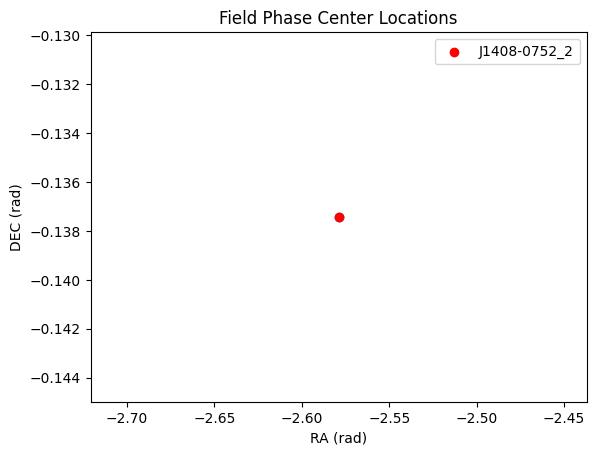

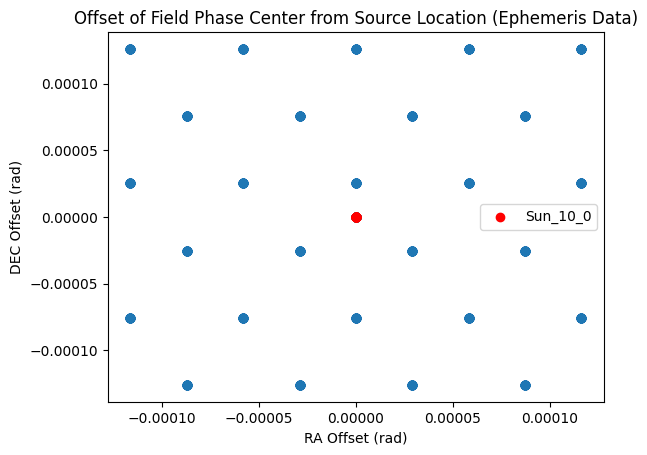

In [16]:
ps_xdt.ps.plot_phase_centers()

## PS Methods: Antenna

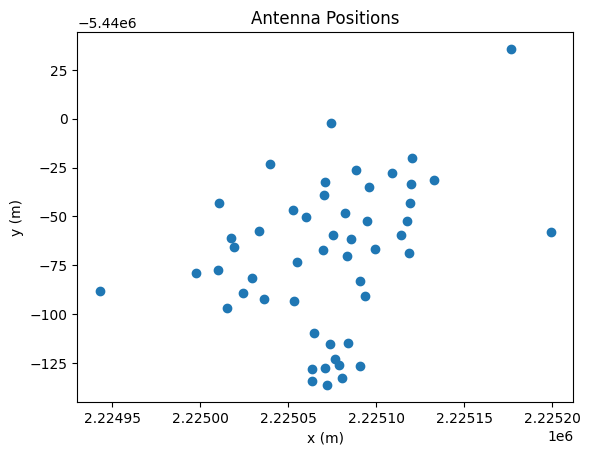

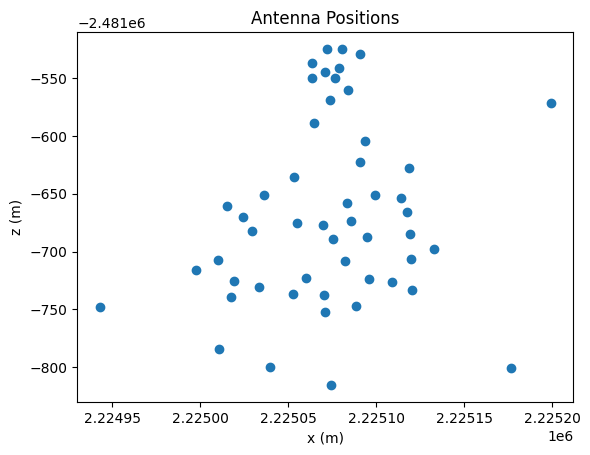

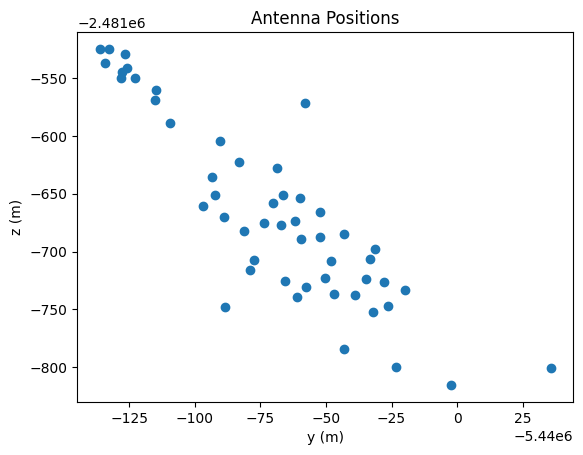

In [17]:
ps_xdt.ps.plot_antenna_positions()

## MSv4 vs MSv2

- An MS v4 is fully self-describing and contains the information for a single observation, spectral window, polarization setup, observation mode, processor, and beam per antenna.
- Data is stored in Datasets of labeled n-dimensional arrays (called data variables) instead of tables.
- The table concept of rows has been replaced by relevant dimensions. For example, the VISIBILITY column in the MAIN table of MS v2 is now an n-dimensional array with dimensions time x baseline x frequency x polarization (row has been split into time x baseline).

## MSv4

**Need to update with DataTree nomenclature**

<!-- <div style="text-align: center;">
    <figure id="figure-1" style="display: inline-block;">
        <img src="https://docs.google.com/drawings/d/e/2PACX-1vQVgjF5xNeIv8gpi2G3R8JXw2bNkVIUXdizIZluCGdnHc4z79ryW2fNUycJAd_CQh9sXLwdlx1oiAAX/pub?w=690&amp;h=510"
             alt="Processing Set and MS v4 schema layout."
             style="display: block; margin: auto;">
        <figcaption>Figure 1: Processing Set and MS v4 schema layout. Optional datasets are indicated by round brackets. Data variables are capitalized. The suffix '_xds' denotes an xarray dataset, while '_info' indicates dictionaries.</figcaption>
    </figure>
</div> -->

In [18]:
ms_xdt = ps_xdt[
    "ALMA_uid___A002_X1003af4_X75a3.split.avg_70"
]
ms_xdt

<xarray.DataTree 'ALMA_uid___A002_X1003af4_X75a3.split.avg_70'>
Group: /ALMA_uid___A002_X1003af4_X75a3.split.avg_70
│   Dimensions:                     (time: 9, baseline_id: 1326, frequency: 7,
│                                    polarization: 2, uvw_label: 3)
│   Coordinates:
│       baseline_antenna1_name      (baseline_id) <U9 48kB ...
│       baseline_antenna2_name      (baseline_id) <U9 48kB ...
│     * baseline_id                 (baseline_id) int64 11kB 0 1 2 ... 1324 1325
│       field_name                  (time) <U28 1kB ...
│     * frequency                   (frequency) float64 56B 2.3e+11 ... 2.301e+11
│     * polarization                (polarization) <U2 16B 'XX' 'YY'
│       scan_name                   (time) <U21 756B '8' '8' '8' '8' ... '8' '8' '8'
│     * time                        (time) float64 72B 1.667e+09 ... 1.667e+09
│     * uvw_label                   (uvw_label) <U1 12B 'u' 'v' 'w'
│   Data variables:
│       EFFECTIVE_INTEGRATION_TIME  (time, baseline_id) float64 95kB ...
│       FLAG                        (time, baseline_id, frequency, polarization) bool 167kB ...
│       TIME_CENTROID               (time, baseline_id) float64 95kB ...
│       UVW                         (time, baseline_id, uvw_label) float64 286kB ...
│       VISIBILITY                  (time, baseline_id, frequency, polarization) complex64 1MB ...
│       WEIGHT                      (time, baseline_id, frequency, polarization) float32 668kB ...
│   Attributes:
│       creation_date:     2025-02-27T18:05:46.583935+00:00
│       data_groups:       {'base': {'correlated_data': 'VISIBILITY', 'flag': 'FL...
│       observation_info:  {'intents': ['OBSERVE_TARGET#ON_SOURCE'], 'observer': ...
│       processor_info:    {'sub_type': 'ALMA_BASELINE', 'type': 'CORRELATOR'}
│       schema_version:    4.0.-9989
│       type:              visibility
│       xradio_version:    0.1.0
├── Group: /ALMA_uid___A002_X1003af4_X75a3.split.avg_70/antenna_xds
│       Dimensions:                 (antenna_name: 51, cartesian_pos_label: 3,
│                                    receptor_label: 2)
│       Coordinates:
│         * antenna_name            (antenna_name) <U9 2kB 'CM01_N602' ... 'DV25_A011'
│         * cartesian_pos_label     (cartesian_pos_label) <U1 12B 'x' 'y' 'z'
│           mount                   (antenna_name) <U6 1kB ...
│           polarization_type       (antenna_name, receptor_label) <U1 408B ...
│         * receptor_label          (receptor_label) <U5 40B 'pol_0' 'pol_1'
│           station                 (antenna_name) <U4 816B ...
│           telescope_name          (antenna_name) <U4 816B ...
│       Data variables:
│           ANTENNA_DISH_DIAMETER   (antenna_name) float64 408B ...
│           ANTENNA_POSITION        (antenna_name, cartesian_pos_label) float64 1kB ...
│           ANTENNA_RECEPTOR_ANGLE  (antenna_name, receptor_label) float64 816B ...
│       Attributes:
│           overall_telescope_name:  ALMA
│           relocatable_antennas:    True
│           type:                    antenna
├── Group: /ALMA_uid___A002_X1003af4_X75a3.split.avg_70/field_and_source_xds_base
│       Dimensions:                       (time: 9, sky_pos_label: 3,
│                                          time_ephemeris: 2, line_label: 1,
│                                          ellipsoid_pos_label: 3, sky_dir_label: 2)
│       Coordinates:
│         * ellipsoid_pos_label           (ellipsoid_pos_label) <U4 48B 'lon' ... 'dist'
│           field_name                    (time) <U28 1kB 'Sun_10_4' ... 'Sun_10_4'
│         * line_label                    (line_label) <U21 84B '0'
│           line_name                     (time, line_label) <U22 792B 'Single_Contin...
│         * sky_dir_label                 (sky_dir_label) <U3 24B 'ra' 'dec'
│         * sky_pos_label                 (sky_pos_label) <U4 48B 'ra' 'dec' 'dist'
│           source_name                   (time) <U28 1kB 'Sun_10_0' ... 'Sun_10_0'
│         * time_ephemeris          

### MSv4: Coordinates

In [19]:
ms_xdt.time

<xarray.DataArray 'time' (time: 9)> Size: 72B
array([1.666705e+09, 1.666705e+09, 1.666705e+09, 1.666705e+09, 1.666705e+09,
       1.666705e+09, 1.666705e+09, 1.666705e+09, 1.666705e+09])
Coordinates:
    field_name  (time) <U28 1kB ...
    scan_name   (time) <U21 756B '8' '8' '8' '8' '8' '8' '8' '8' '8'
  * time        (time) float64 72B 1.667e+09 1.667e+09 ... 1.667e+09 1.667e+09
Attributes:
    effective_integration_time:  EFFECTIVE_INTEGRATION_TIME
    format:                      unix
    integration_time:            {'attrs': {'type': 'quantity', 'units': ['s'...
    scale:                       utc
    type:                        time
    units:                       ['s']

### MSv4: Data Variables

In [20]:
ms_xdt.WEIGHT

<xarray.DataArray 'WEIGHT' (time: 9, baseline_id: 1326, frequency: 7,
                            polarization: 2)> Size: 668kB
[167076 values with dtype=float32]
Coordinates:
    baseline_antenna1_name  (baseline_id) <U9 48kB ...
    baseline_antenna2_name  (baseline_id) <U9 48kB ...
  * baseline_id             (baseline_id) int64 11kB 0 1 2 3 ... 1323 1324 1325
    field_name              (time) <U28 1kB ...
  * frequency               (frequency) float64 56B 2.3e+11 ... 2.301e+11
  * polarization            (polarization) <U2 16B 'XX' 'YY'
    scan_name               (time) <U21 756B '8' '8' '8' '8' '8' '8' '8' '8' '8'
  * time                    (time) float64 72B 1.667e+09 1.667e+09 ... 1.667e+09
Attributes:
    type:     quanta
    units:    ['unkown']

In [21]:
ms_xdt.VISIBILITY

<xarray.DataArray 'VISIBILITY' (time: 9, baseline_id: 1326, frequency: 7,
                                polarization: 2)> Size: 1MB
[167076 values with dtype=complex64]
Coordinates:
    baseline_antenna1_name  (baseline_id) <U9 48kB ...
    baseline_antenna2_name  (baseline_id) <U9 48kB ...
  * baseline_id             (baseline_id) int64 11kB 0 1 2 3 ... 1323 1324 1325
    field_name              (time) <U28 1kB ...
  * frequency               (frequency) float64 56B 2.3e+11 ... 2.301e+11
  * polarization            (polarization) <U2 16B 'XX' 'YY'
    scan_name               (time) <U21 756B '8' '8' '8' '8' '8' '8' '8' '8' '8'
  * time                    (time) float64 72B 1.667e+09 1.667e+09 ... 1.667e+09
Attributes:
    type:     quanta
    units:    ['unkown']

In [22]:
import numpy as np 
np.abs(ms_xdt.VISIBILITY).max().compute()

<xarray.DataArray 'VISIBILITY' ()> Size: 4B
array(1.5041896, dtype=float32)

### MSv4 sub-xds: antenna_xds

The MSv4 has xarray datasets in its attributes that represent metadata where n-dimensional arrays is included. Some examples are the `antenna_xds`, `weather_xds` and `pointing_xds`. This would be the equivalent to some subtables of the MSv2. Let's look into the antenna sub-xds:


In [23]:
ant_xds = ms_xdt["antenna_xds"]
ant_xds

<xarray.DataTree 'antenna_xds'>
Group: /ALMA_uid___A002_X1003af4_X75a3.split.avg_70/antenna_xds
    Dimensions:                 (time: 9, baseline_id: 1326, frequency: 7,
                                 polarization: 2, uvw_label: 3, antenna_name: 51,
                                 cartesian_pos_label: 3, receptor_label: 2)
    Coordinates:
      * antenna_name            (antenna_name) <U9 2kB 'CM01_N602' ... 'DV25_A011'
      * cartesian_pos_label     (cartesian_pos_label) <U1 12B 'x' 'y' 'z'
        mount                   (antenna_name) <U6 1kB ...
        polarization_type       (antenna_name, receptor_label) <U1 408B ...
      * receptor_label          (receptor_label) <U5 40B 'pol_0' 'pol_1'
        station                 (antenna_name) <U4 816B ...
        telescope_name          (antenna_name) <U4 816B ...
    Inherited coordinates:
      * baseline_id             (baseline_id) int64 11kB 0 1 2 3 ... 1323 1324 1325
      * frequency               (frequency) float64 56B 2.3e+11 ... 2.301e+11
      * polarization            (polarization) <U2 16B 'XX' 'YY'
      * time                    (time) float64 72B 1.667e+09 1.667e+09 ... 1.667e+09
      * uvw_label               (uvw_label) <U1 12B 'u' 'v' 'w'
    Data variables:
        ANTENNA_DISH_DIAMETER   (antenna_name) float64 408B ...
        ANTENNA_POSITION        (antenna_name, cartesian_pos_label) float64 1kB ...
        ANTENNA_RECEPTOR_ANGLE  (antenna_name, receptor_label) float64 816B ...
    Attributes:
        overall_telescope_name:  ALMA
        relocatable_antennas:    True
        type:                    antenna

As an xarray dataset, the antenna sub-xds can be used via the same API as the main xds.

## Data Selection Examples

One can use the usual selection functionality of xarray with all arrays, the main dataset and all sub datasets. For example, selection by labels, `sel()`:

In [24]:
ms_xdt.frequency

<xarray.DataArray 'frequency' (frequency: 7)> Size: 56B
array([2.299609e+11, 2.299766e+11, 2.299922e+11, 2.300078e+11, 2.300234e+11,
       2.300391e+11, 2.300547e+11])
Coordinates:
  * frequency  (frequency) float64 56B 2.3e+11 2.3e+11 ... 2.3e+11 2.301e+11
Attributes:
    channel_width:         {'attrs': {'type': 'quantity', 'units': ['Hz']}, '...
    observer:              TOPO
    reference_frequency:   {'attrs': {'observer': 'TOPO', 'type': 'spectral_c...
    spectral_window_id:    2
    spectral_window_name:  X767114449#ALMA_RB_06#BB_1#SW-01#FULL_RES_2
    type:                  spectral_coord
    units:                 ['Hz']

In [25]:
sel_xds = ms_xdt.sel(frequency=slice(2.2997e+11, 2.3001e+11))
sel_xds.frequency

<xarray.DataArray 'frequency' (frequency: 3)> Size: 24B
array([2.299766e+11, 2.299922e+11, 2.300078e+11])
Coordinates:
  * frequency  (frequency) float64 24B 2.3e+11 2.3e+11 2.3e+11
Attributes:
    channel_width:         {'attrs': {'type': 'quantity', 'units': ['Hz']}, '...
    observer:              TOPO
    reference_frequency:   {'attrs': {'observer': 'TOPO', 'type': 'spectral_c...
    spectral_window_id:    2
    spectral_window_name:  X767114449#ALMA_RB_06#BB_1#SW-01#FULL_RES_2
    type:                  spectral_coord
    units:                 ['Hz']

Or selection by indices, `isel()`

In [26]:
isel_xds = ms_xdt.isel(frequency=slice(1, 4))
isel_xds.frequency

<xarray.DataArray 'frequency' (frequency: 3)> Size: 24B
array([2.299766e+11, 2.299922e+11, 2.300078e+11])
Coordinates:
  * frequency  (frequency) float64 24B 2.3e+11 2.3e+11 2.3e+11
Attributes:
    channel_width:         {'attrs': {'type': 'quantity', 'units': ['Hz']}, '...
    observer:              TOPO
    reference_frequency:   {'attrs': {'observer': 'TOPO', 'type': 'spectral_c...
    spectral_window_id:    2
    spectral_window_name:  X767114449#ALMA_RB_06#BB_1#SW-01#FULL_RES_2
    type:                  spectral_coord
    units:                 ['Hz']

## MSv4: Data Groups

The `correlated_xds` can contain multiple copies of `VISIBILITY`/`SPECTRUM`, `UVW`, `WEIGHT`, and `FLAG` data variables. To maintain the relationship between a set of data variables, a `data_group` dictionary is used with fixed lowercase keys: 'correlated_data', 'uvw', 'weight', and 'flag'. 

In [27]:
ms_xdt

<xarray.DataTree 'ALMA_uid___A002_X1003af4_X75a3.split.avg_70'>
Group: /ALMA_uid___A002_X1003af4_X75a3.split.avg_70
│   Dimensions:                     (time: 9, baseline_id: 1326, frequency: 7,
│                                    polarization: 2, uvw_label: 3)
│   Coordinates:
│       baseline_antenna1_name      (baseline_id) <U9 48kB ...
│       baseline_antenna2_name      (baseline_id) <U9 48kB ...
│     * baseline_id                 (baseline_id) int64 11kB 0 1 2 ... 1324 1325
│       field_name                  (time) <U28 1kB ...
│     * frequency                   (frequency) float64 56B 2.3e+11 ... 2.301e+11
│     * polarization                (polarization) <U2 16B 'XX' 'YY'
│       scan_name                   (time) <U21 756B '8' '8' '8' '8' ... '8' '8' '8'
│     * time                        (time) float64 72B 1.667e+09 ... 1.667e+09
│     * uvw_label                   (uvw_label) <U1 12B 'u' 'v' 'w'
│   Data variables:
│       EFFECTIVE_INTEGRATION_TIME  (time, baseline_id) float64 95kB ...
│       FLAG                        (time, baseline_id, frequency, polarization) bool 167kB ...
│       TIME_CENTROID               (time, baseline_id) float64 95kB ...
│       UVW                         (time, baseline_id, uvw_label) float64 286kB ...
│       VISIBILITY                  (time, baseline_id, frequency, polarization) complex64 1MB ...
│       WEIGHT                      (time, baseline_id, frequency, polarization) float32 668kB ...
│   Attributes:
│       creation_date:     2025-02-27T18:05:46.583935+00:00
│       data_groups:       {'base': {'correlated_data': 'VISIBILITY', 'flag': 'FL...
│       observation_info:  {'intents': ['OBSERVE_TARGET#ON_SOURCE'], 'observer': ...
│       processor_info:    {'sub_type': 'ALMA_BASELINE', 'type': 'CORRELATOR'}
│       schema_version:    4.0.-9989
│       type:              visibility
│       xradio_version:    0.1.0
├── Group: /ALMA_uid___A002_X1003af4_X75a3.split.avg_70/antenna_xds
│       Dimensions:                 (antenna_name: 51, cartesian_pos_label: 3,
│                                    receptor_label: 2)
│       Coordinates:
│         * antenna_name            (antenna_name) <U9 2kB 'CM01_N602' ... 'DV25_A011'
│         * cartesian_pos_label     (cartesian_pos_label) <U1 12B 'x' 'y' 'z'
│           mount                   (antenna_name) <U6 1kB ...
│           polarization_type       (antenna_name, receptor_label) <U1 408B ...
│         * receptor_label          (receptor_label) <U5 40B 'pol_0' 'pol_1'
│           station                 (antenna_name) <U4 816B ...
│           telescope_name          (antenna_name) <U4 816B ...
│       Data variables:
│           ANTENNA_DISH_DIAMETER   (antenna_name) float64 408B ...
│           ANTENNA_POSITION        (antenna_name, cartesian_pos_label) float64 1kB ...
│           ANTENNA_RECEPTOR_ANGLE  (antenna_name, receptor_label) float64 816B ...
│       Attributes:
│           overall_telescope_name:  ALMA
│           relocatable_antennas:    True
│           type:                    antenna
├── Group: /ALMA_uid___A002_X1003af4_X75a3.split.avg_70/field_and_source_xds_base
│       Dimensions:                       (time: 9, sky_pos_label: 3,
│                                          time_ephemeris: 2, line_label: 1,
│                                          ellipsoid_pos_label: 3, sky_dir_label: 2)
│       Coordinates:
│         * ellipsoid_pos_label           (ellipsoid_pos_label) <U4 48B 'lon' ... 'dist'
│           field_name                    (time) <U28 1kB 'Sun_10_4' ... 'Sun_10_4'
│         * line_label                    (line_label) <U21 84B '0'
│           line_name                     (time, line_label) <U22 792B 'Single_Contin...
│         * sky_dir_label                 (sky_dir_label) <U3 24B 'ra' 'dec'
│         * sky_pos_label                 (sky_pos_label) <U4 48B 'ra' 'dec' 'dist'
│           source_name                   (time) <U28 1kB 'Sun_10_0' ... 'Sun_10_0'
│         * time_ephemeris          

In [28]:
ms_xdt.data_groups

{'base': {'correlated_data': 'VISIBILITY',
  'flag': 'FLAG',
  'uvw': 'UVW',
  'weight': 'WEIGHT'}}

In [29]:
ms_xdt["VISIBILITY_CORRECTED"] = ms_xdt.VISIBILITY
ms_xdt["WEIGHTS_IMAGING"] = ms_xdt.WEIGHT
ms_xdt.data_groups["corrected"] = {"correlated_data": "VISIBILITY_CORRECTED",
                                "flag": "FLAG",
                                "uvw": "UVW",
                                "weight": "WEIGHT_IMAGING"}
ms_xdt.data_groups

{'base': {'correlated_data': 'VISIBILITY',
  'flag': 'FLAG',
  'uvw': 'UVW',
  'weight': 'WEIGHT'},
 'corrected': {'correlated_data': 'VISIBILITY_CORRECTED',
  'flag': 'FLAG',
  'uvw': 'UVW',
  'weight': 'WEIGHT_IMAGING'}}

In [30]:
ms_xdt

<xarray.DataTree 'ALMA_uid___A002_X1003af4_X75a3.split.avg_70'>
Group: /ALMA_uid___A002_X1003af4_X75a3.split.avg_70
│   Dimensions:                     (time: 9, baseline_id: 1326, frequency: 7,
│                                    polarization: 2, uvw_label: 3)
│   Coordinates:
│       baseline_antenna1_name      (baseline_id) <U9 48kB ...
│       baseline_antenna2_name      (baseline_id) <U9 48kB ...
│     * baseline_id                 (baseline_id) int64 11kB 0 1 2 ... 1324 1325
│       field_name                  (time) <U28 1kB ...
│     * frequency                   (frequency) float64 56B 2.3e+11 ... 2.301e+11
│     * polarization                (polarization) <U2 16B 'XX' 'YY'
│       scan_name                   (time) <U21 756B '8' '8' '8' '8' ... '8' '8' '8'
│     * time                        (time) float64 72B 1.667e+09 ... 1.667e+09
│     * uvw_label                   (uvw_label) <U1 12B 'u' 'v' 'w'
│   Data variables:
│       EFFECTIVE_INTEGRATION_TIME  (time, baseline_id) float64 95kB ...
│       FLAG                        (time, baseline_id, frequency, polarization) bool 167kB ...
│       TIME_CENTROID               (time, baseline_id) float64 95kB ...
│       UVW                         (time, baseline_id, uvw_label) float64 286kB ...
│       VISIBILITY                  (time, baseline_id, frequency, polarization) complex64 1MB ...
│       WEIGHT                      (time, baseline_id, frequency, polarization) float32 668kB ...
│       VISIBILITY_CORRECTED        (time, baseline_id, frequency, polarization) complex64 1MB ...
│       WEIGHTS_IMAGING             (time, baseline_id, frequency, polarization) float32 668kB ...
│   Attributes:
│       creation_date:     2025-02-27T18:05:46.583935+00:00
│       data_groups:       {'base': {'correlated_data': 'VISIBILITY', 'flag': 'FL...
│       observation_info:  {'intents': ['OBSERVE_TARGET#ON_SOURCE'], 'observer': ...
│       processor_info:    {'sub_type': 'ALMA_BASELINE', 'type': 'CORRELATOR'}
│       schema_version:    4.0.-9989
│       type:              visibility
│       xradio_version:    0.1.0
├── Group: /ALMA_uid___A002_X1003af4_X75a3.split.avg_70/antenna_xds
│       Dimensions:                 (antenna_name: 51, cartesian_pos_label: 3,
│                                    receptor_label: 2)
│       Coordinates:
│         * antenna_name            (antenna_name) <U9 2kB 'CM01_N602' ... 'DV25_A011'
│         * cartesian_pos_label     (cartesian_pos_label) <U1 12B 'x' 'y' 'z'
│           mount                   (antenna_name) <U6 1kB ...
│           polarization_type       (antenna_name, receptor_label) <U1 408B ...
│         * receptor_label          (receptor_label) <U5 40B 'pol_0' 'pol_1'
│           station                 (antenna_name) <U4 816B ...
│           telescope_name          (antenna_name) <U4 816B ...
│       Data variables:
│           ANTENNA_DISH_DIAMETER   (antenna_name) float64 408B ...
│           ANTENNA_POSITION        (antenna_name, cartesian_pos_label) float64 1kB ...
│           ANTENNA_RECEPTOR_ANGLE  (antenna_name, receptor_label) float64 816B ...
│       Attributes:
│           overall_telescope_name:  ALMA
│           relocatable_antennas:    True
│           type:                    antenna
├── Group: /ALMA_uid___A002_X1003af4_X75a3.split.avg_70/field_and_source_xds_base
│       Dimensions:                       (time: 9, sky_pos_label: 3,
│                                          time_ephemeris: 2, line_label: 1,
│                                          ellipsoid_pos_label: 3, sky_dir_label: 2)
│       Coordinates:
│         * ellipsoid_pos_label           (ellipsoid_pos_label) <U4 48B 'lon' ... 'dist'
│           field_name                    (time) <U28 1kB 'Sun_10_4' ... 'Sun_10_4'
│         * line_label                    (line_label) <U21 84B '0'
│           line_name                     (time, line_label) <U22 792B 'Single_Contin...
│         * sky_dir_label                 (sky_dir_label) <U3 24B 'ra' 'dec'
│     

In [31]:
ms_corrected_xdt = ms_xdt.ms.sel(data_group_name="corrected")
ms_corrected_xdt

<xarray.DataTree 'ALMA_uid___A002_X1003af4_X75a3.split.avg_70'>
Group: /ALMA_uid___A002_X1003af4_X75a3.split.avg_70
│   Dimensions:                     (time: 9, baseline_id: 1326, frequency: 7,
│                                    polarization: 2, uvw_label: 3)
│   Coordinates:
│       baseline_antenna1_name      (baseline_id) <U9 48kB ...
│       baseline_antenna2_name      (baseline_id) <U9 48kB ...
│     * baseline_id                 (baseline_id) int64 11kB 0 1 2 ... 1324 1325
│       field_name                  (time) <U28 1kB ...
│     * frequency                   (frequency) float64 56B 2.3e+11 ... 2.301e+11
│     * polarization                (polarization) <U2 16B 'XX' 'YY'
│       scan_name                   (time) <U21 756B '8' '8' '8' '8' ... '8' '8' '8'
│     * time                        (time) float64 72B 1.667e+09 ... 1.667e+09
│     * uvw_label                   (uvw_label) <U1 12B 'u' 'v' 'w'
│   Data variables:
│       EFFECTIVE_INTEGRATION_TIME  (time, baseline_id) float64 95kB ...
│       FLAG                        (time, baseline_id, frequency, polarization) bool 167kB ...
│       TIME_CENTROID               (time, baseline_id) float64 95kB ...
│       UVW                         (time, baseline_id, uvw_label) float64 286kB ...
│       VISIBILITY_CORRECTED        (time, baseline_id, frequency, polarization) complex64 1MB ...
│       WEIGHTS_IMAGING             (time, baseline_id, frequency, polarization) float32 668kB ...
│   Attributes:
│       creation_date:     2025-02-27T18:05:46.583935+00:00
│       data_groups:       {'corrected': {'correlated_data': 'VISIBILITY_CORRECTE...
│       observation_info:  {'intents': ['OBSERVE_TARGET#ON_SOURCE'], 'observer': ...
│       processor_info:    {'sub_type': 'ALMA_BASELINE', 'type': 'CORRELATOR'}
│       schema_version:    4.0.-9989
│       type:              visibility
│       xradio_version:    0.1.0
├── Group: /ALMA_uid___A002_X1003af4_X75a3.split.avg_70/antenna_xds
│       Dimensions:                 (antenna_name: 51, cartesian_pos_label: 3,
│                                    receptor_label: 2)
│       Coordinates:
│         * antenna_name            (antenna_name) <U9 2kB 'CM01_N602' ... 'DV25_A011'
│         * cartesian_pos_label     (cartesian_pos_label) <U1 12B 'x' 'y' 'z'
│           mount                   (antenna_name) <U6 1kB ...
│           polarization_type       (antenna_name, receptor_label) <U1 408B ...
│         * receptor_label          (receptor_label) <U5 40B 'pol_0' 'pol_1'
│           station                 (antenna_name) <U4 816B ...
│           telescope_name          (antenna_name) <U4 816B ...
│       Data variables:
│           ANTENNA_DISH_DIAMETER   (antenna_name) float64 408B ...
│           ANTENNA_POSITION        (antenna_name, cartesian_pos_label) float64 1kB ...
│           ANTENNA_RECEPTOR_ANGLE  (antenna_name, receptor_label) float64 816B ...
│       Attributes:
│           overall_telescope_name:  ALMA
│           relocatable_antennas:    True
│           type:                    antenna
├── Group: /ALMA_uid___A002_X1003af4_X75a3.split.avg_70/field_and_source_xds_base
│       Dimensions:                       (time: 9, sky_pos_label: 3,
│                                          time_ephemeris: 2, line_label: 1,
│                                          ellipsoid_pos_label: 3, sky_dir_label: 2)
│       Coordinates:
│         * ellipsoid_pos_label           (ellipsoid_pos_label) <U4 48B 'lon' ... 'dist'
│           field_name                    (time) <U28 1kB 'Sun_10_4' ... 'Sun_10_4'
│         * line_label                    (line_label) <U21 84B '0'
│           line_name                     (time, line_label) <U22 792B 'Single_Contin...
│         * sky_dir_label                 (sky_dir_label) <U3 24B 'ra' 'dec'
│         * sky_pos_label                 (sky_pos_label) <U4 48B 'ra' 'dec' 'dist'
│           source_name                   (time) <U28 1kB 'Sun_10_0' ... 'Sun_10_0'
│         * time_ephemeris          